In [10]:
%pylab inline
import numpy as np
a = np.array([0,1,2,3,4,5])
b = np.array([2,3,4,5,6,7])
print a+b
print a*b
b = a.reshape((3,2))
print b


Populating the interactive namespace from numpy and matplotlib
[ 2  4  6  8 10 12]
[ 0  3  8 15 24 35]
[[0 1]
 [2 3]
 [4 5]]


In [13]:
a =np.array([0,1,2,3,4,5])
print a[np.array([2,3,4])]# filter value by position 
print a > 4
print a[a>4] # filter value by logic 
a[a>4] = 4
print a

print a
print a.clip(0,3)
print a.clip(1,3)
#help(a.clip)

[2 3 4]
[False False False False False  True]
[5]
[0 1 2 3 4 4]
[0 1 2 3 4 4]
[0 1 2 3 3 3]
[1 1 2 3 3 3]


In [14]:
c = np.array([1,2,np.NAN,3,4])
print c
print np.isnan(c)
print c[~np.isnan(c)]
print np.mean(c[~np.isnan(c)])


[  1.   2.  nan   3.   4.]
[False False  True False False]
[ 1.  2.  3.  4.]
2.5


In [23]:
import os 
import scipy as sp
import matplotlib.pyplot as plt 
data = sp.genfromtxt('/Users/jeff/Desktop/web_traffic.tsv',delimiter="\t")
#print data[:10]
# fix invalid entries
x = data[:, 0]
y = data[:, 1]
print type(x)
#print x
#print sp.isnan(y)
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]
#print x

<type 'numpy.ndarray'>


Populating the interactive namespace from numpy and matplotlib


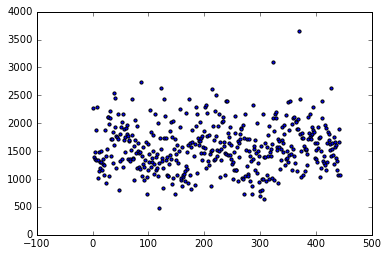

In [24]:
%pylab inline
plt.clf()
plt.scatter(x, y, s=10)

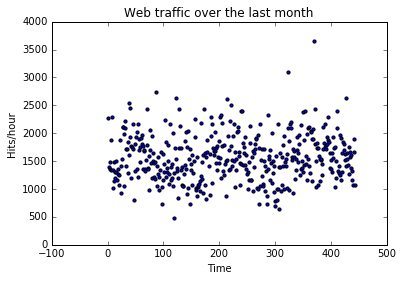

In [25]:
plt.clf()

plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.scatter(x, y, s=10)

In [26]:
fp1, res, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)
print("Model parameters: %s" % fp1)
print("Error of the model:", res)

Model parameters: [  1.90757550e-01   1.52088530e+03]
('Error of the model:', array([ 77430051.52827892]))


In [27]:
# plot function for input data
colors = ['g', 'k', 'b', 'm', 'r']
#linestyles = ['-', '-.', '--', ':', '-']
linestyles = '-' * 5 

def plot_models(x, y, models, mx=None, ymax=None, xmin=None):
    plt.clf()
    plt.scatter(x, y, s=10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], ["week %i" % w for w in range(10)])
    if models:
        if mx is None:
            mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)
        plt.legend(["d=%i" % m.order for m in models], loc="upper left")
    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')

/Users/jeff/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:586: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/Users/jeff/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


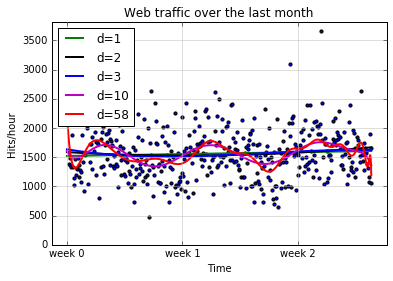

In [28]:
f1 = sp.poly1d(sp.polyfit(x, y, 1))
f2 = sp.poly1d(sp.polyfit(x, y, 2))
f3 = sp.poly1d(sp.polyfit(x, y, 3))
f10 = sp.poly1d(sp.polyfit(x, y, 10))
f100 = sp.poly1d(sp.polyfit(x, y, 100))
#plot_models(x, y, [f1])
plot_models(x, y, [f1, f2, f3, f10, f100])